In [3]:
import  pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import sys

In [4]:
df = pd.read_table('./df_cl',sep =',',low_memory=False)

In [5]:
df.head(2)

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,CAT10,CAT23,CAT29
0,1,00000000000S702,1,6.0,1.0,04007,0.0,09,53.0,0.0,...,Y,5/9/2019,B,Z,0,100.0,0,G,7,145.50
1,1,00000000000S703,1,6.0,1.0,04003,0.0,09,53.0,3004.0,...,Y,5/9/2019,B,Z,0,100.0,0,G,7,133.28


In [6]:
df['YEAR_BUILT_027'] = df['YEAR_BUILT_027'].astype(int)

In [7]:
date = df[['YEAR_BUILT_027','TOTAL_IMP_COST_096','STRUCTURE_KIND_043A']]
date.set_index('YEAR_BUILT_027', inplace=True)

In [8]:
Material = { 2:'Concrete continuous', 1:'Concret', 3:'Steel', 4:'Steel continous', 5:'Prestressed concret',
          6:'Prestressed concret continous', 7:'Wood or Timber' ,8:'Masonary',9:'Almunuim',0:'Other'
           }
date['STRUCTURE_KIND_043A'].replace(Material,inplace = True)

C:\Users\kajib\Anaconda3\patkajos812\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [9]:
date.head()

,TOTAL_IMP_COST_096,STRUCTURE_KIND_043A
YEAR_BUILT_027,,
1999,0.0,Prestressed concret
2002,0.0,Prestressed concret
1942,2.0,Concret
1937,60000.0,Steel
1924,45000.0,Steel continous


In [10]:
data_concret = date.loc[(date['STRUCTURE_KIND_043A'] == 'Concret') | (date['STRUCTURE_KIND_043A']=='Prestressed concret')]
data_steel = date.loc[(date['STRUCTURE_KIND_043A'] == 'Steel') | (date['STRUCTURE_KIND_043A']=='Steel continous')]
annual_concret = pd.DataFrame(data_concret['TOTAL_IMP_COST_096'].groupby(data_concret.index).sum())
annual_steel = pd.DataFrame(data_steel['TOTAL_IMP_COST_096'].groupby(data_steel.index).sum())

In [11]:
data_steel['TOTAL_IMP_COST_096'].mean()

6542.220393597117

In [12]:
data_concret['TOTAL_IMP_COST_096'].mean()

4090.237714676702

In [13]:
print(annual_concret.head())
print("---------------------------------")
print(annual_steel.head())

                TOTAL_IMP_COST_096
YEAR_BUILT_027                    
1800                         242.0
1825                        6537.0
1827                         136.0
1832                        3075.0
1841                           0.0
---------------------------------
                TOTAL_IMP_COST_096
YEAR_BUILT_027                    
1796                        4498.0
1810                        4534.0
1812                         150.0
1825                         177.0
1830                         300.0


In [14]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [15]:
date.columns 

Index(['TOTAL_IMP_COST_096', 'STRUCTURE_KIND_043A'], dtype='object')

In [16]:
def z_score(X):
    list_col= list(X.columns)
    for col in list_col:
        df_z = (X[col]-X[col].mean())/X[col].std()
        return df_z
Scale = pd.DataFrame(z_score(data_concret))

In [17]:
Scale.head(2)

,TOTAL_IMP_COST_096
YEAR_BUILT_027,
1999,-0.088241
2002,-0.088241


In [18]:
scale = pd.DataFrame(Scale['TOTAL_IMP_COST_096'].groupby(data_concret.index).sum())

Text(0.5, 1.0, '')

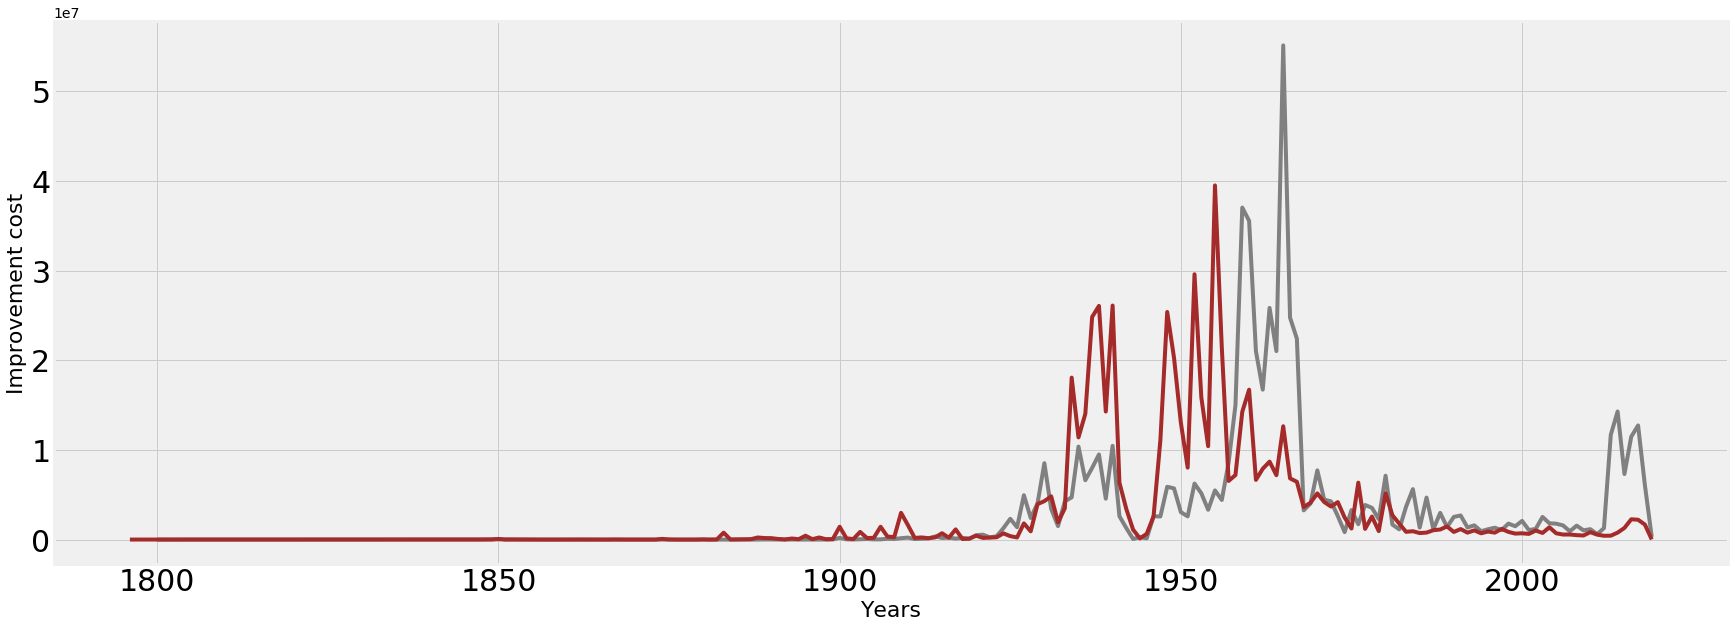

In [19]:
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')
plt.plot(annual_concret , c = 'gray')
plt.plot(annual_steel , c = 'brown')
plt.xlabel('Years', fontsize=22)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('Improvement cost', fontsize=22)
plt.title('')

In [20]:
Scale2 = pd.DataFrame(z_score(data_steel))

Text(0, 0.5, 'Improvement cost')

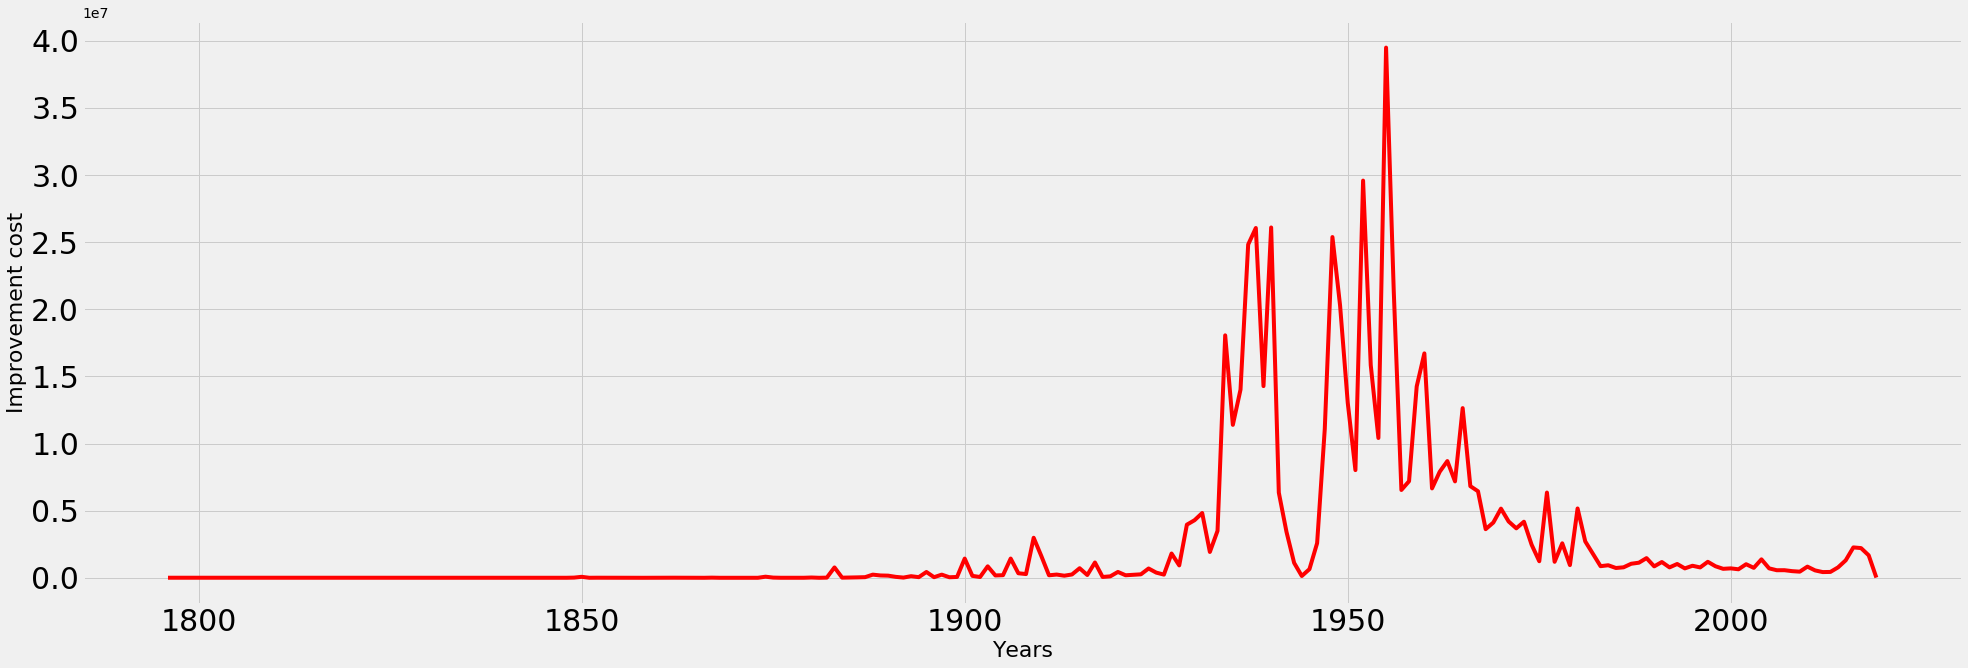

In [21]:
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')
plt.plot(annual_steel , c = 'r')
plt.xlabel('Years', fontsize=22)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('Improvement cost', fontsize=22)

Text(0, 0.5, 'Improvement cost')

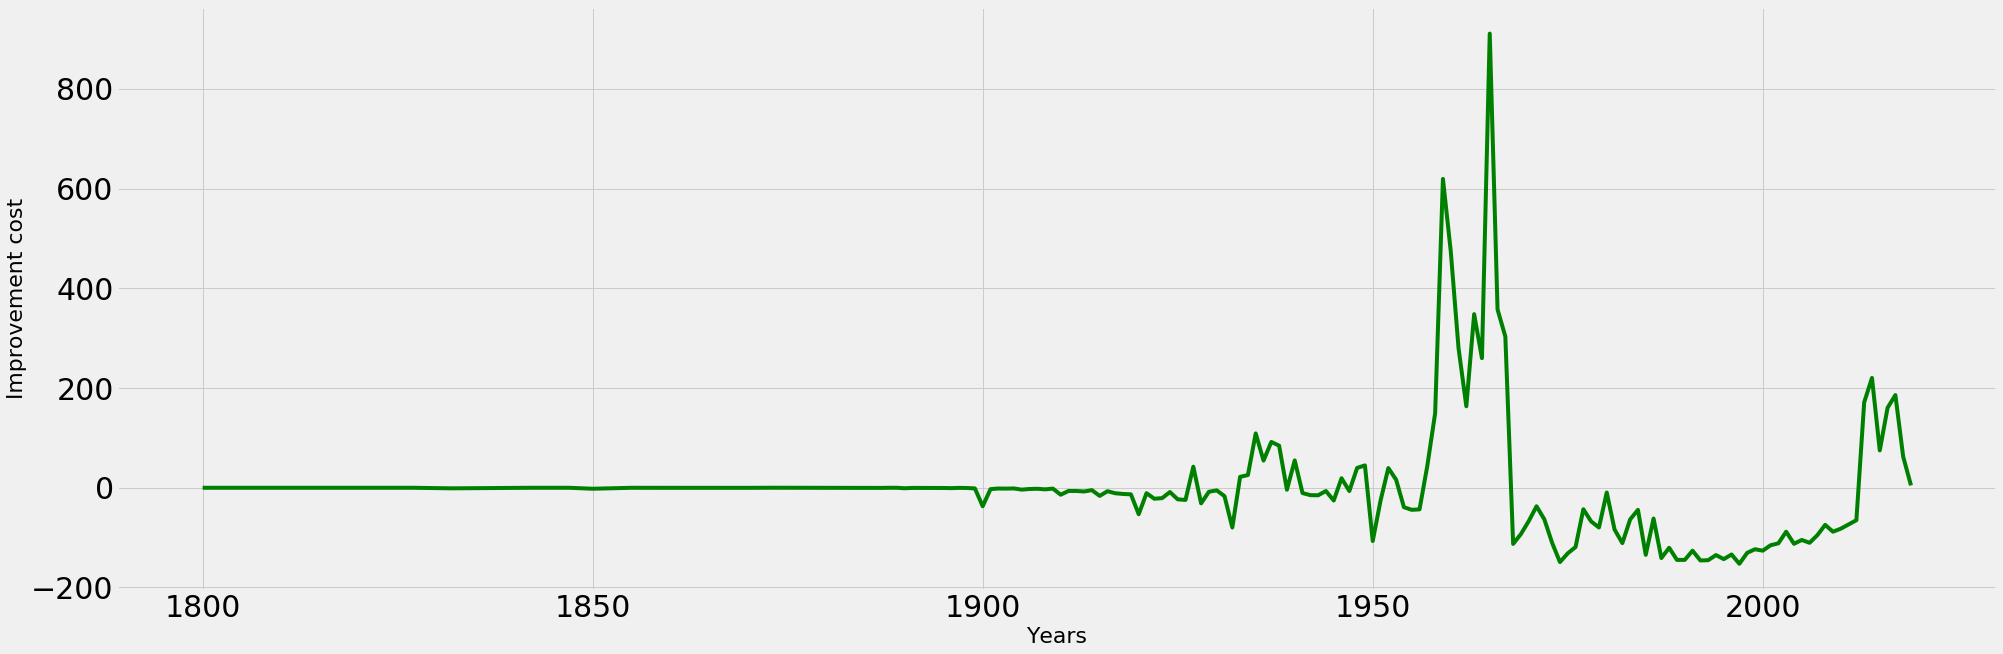

In [22]:
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')
plt.plot(scale , c = 'g')
plt.xlabel('Years', fontsize=22)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('Improvement cost', fontsize=22)

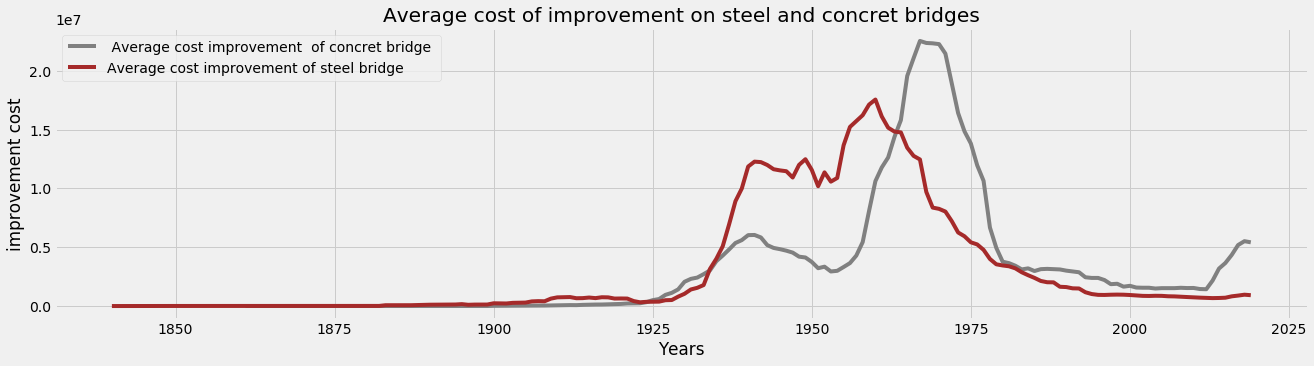

In [31]:
#rolmean1  = annual_cost.rolling(window = 1).mean()
#rolmean4  = annual_cost.rolling(window = 4).mean()
rolmean1 = annual_concret.rolling(window = 13).mean()
rolmean2 = annual_steel.rolling(window = 13).mean()

# Plot
plt.figure(figsize=(20,5))
#plt.plot(rolmean1, color='black', label='Rolling Mean (1 week)')
#plt.plot(rolmean4, color='green', label='Rolling Mean (4 week)')
plt.plot(rolmean1, color='gray', label=' Average cost improvement  of concret bridge ')
plt.plot(rolmean2, color='brown', label='Average cost improvement of steel bridge')

plt.legend(loc='best')

plt.title('Average cost of improvement on steel and concret bridges')
plt.ylabel('improvement cost')
plt.xlabel('Years')
plt.savefig('timeserie')

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

NameError: name 'annual_cost' is not defined

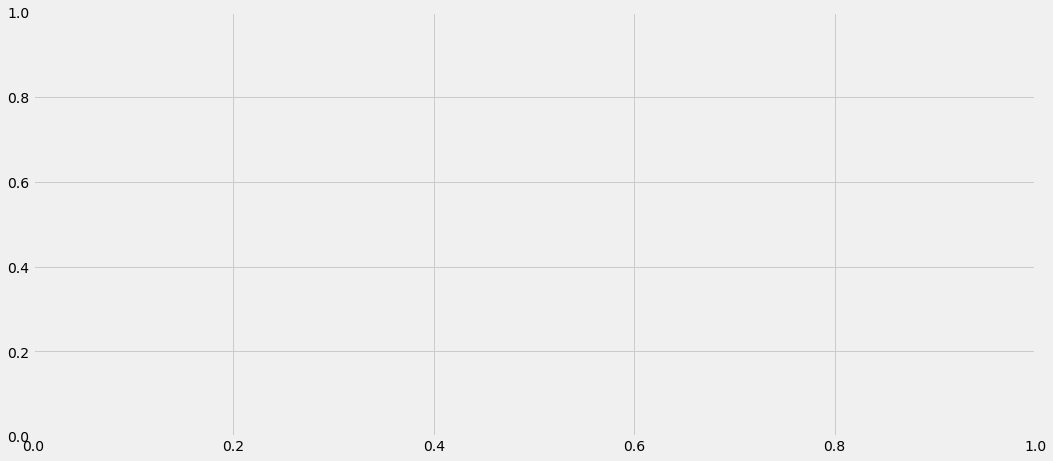

In [25]:

fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(211)
fig = plot_acf(annual_cost, lags=52, ax=ax1)

In [ ]:
fig = plt.figure(figsize=(16,16))
ax2 = fig.add_subplot(212)
fig = plot_pacf(annual_cost, lags=52, ax=ax2);